In [2]:
# from pyemittance.otrs_io import get_beamsizes_otrs
# get_beamsizes_otrs(False)
from pyemittance.image import Image
import numpy as np

In [1]:
!pwd

/home/physics3/ml_tuning/20220806_LCLS2_inj


In [10]:
# look from 12:07 to 12:19
image = np.load("../../ml_tuning/20220805_LCLS2_inj/data_saving/saved_images/im", allow_pickle=True)
#image = np.load("./example_images/HTR330_bk_4.npy", allow_pickle=True)

ncol = 1040 
nrow = 1392
bg_image = "./example_images/bg_8_6_22.npy"

In [13]:
import epics
# im = epics.caget('OTRS:HTR:330:Image:R')

In [9]:
epics.caget('OTRS:HTR:330:RESOLUTION')*14.2

349.178

In [15]:
# Measured energy in eV
energy_meas = epics.caget('BEND:HTR:480:BACT') * 1e9
energy_meas/10**9

0.08003661996661768

In [6]:
#np.save("bg_8_6_22", im, allow_pickle=True)

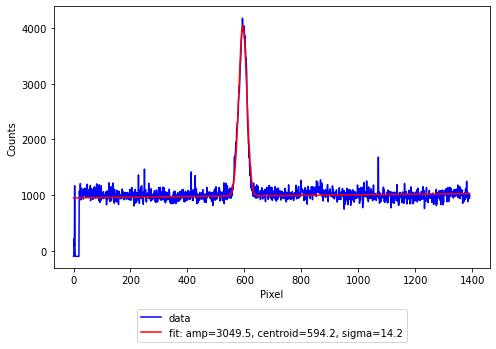

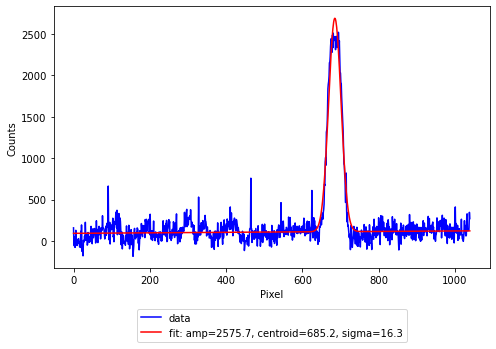

In [11]:
im = Image(image, ncol, nrow, bg_image=bg_image)

im.reshape_im()
im.subtract_bg()
im.get_im_projection()

# plt.imshow(im.proc_image)

meas =  im.get_sizes(show_plots=True)

In [30]:
300*5

1500

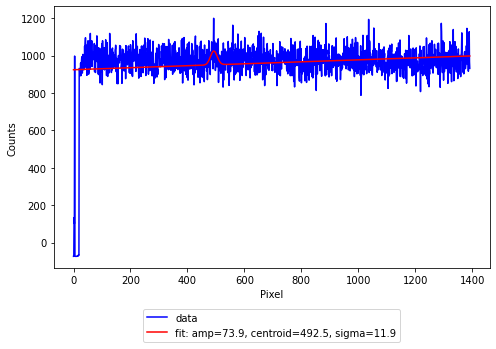

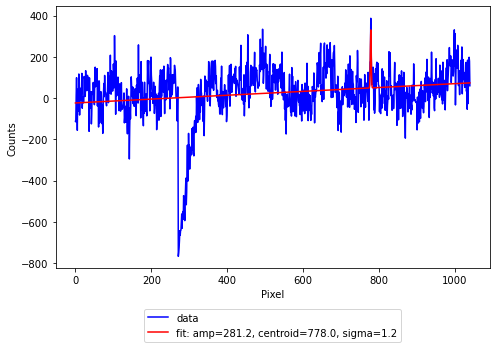

In [13]:
im = Image(image, ncol, nrow, bg_image=bg_image)

im.reshape_im()
im.subtract_bg()
im.get_im_projection()

# plt.imshow(im.proc_image)

meas =  im.get_sizes(show_plots=True)

In [31]:
11.9*300

3570.0

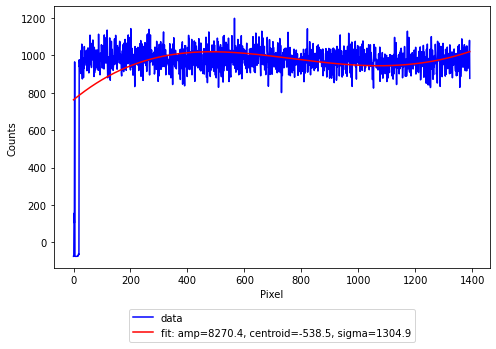

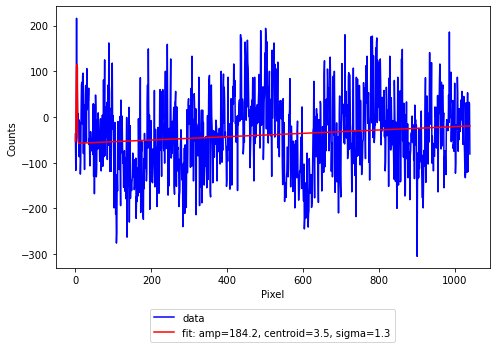

In [11]:
im = Image(image, ncol, nrow, bg_image=bg_image)

im.reshape_im()
im.subtract_bg()
im.get_im_projection()

# plt.imshow(im.proc_image)

meas =  im.get_sizes(show_plots=True)

In [16]:
1304*8270

10784080

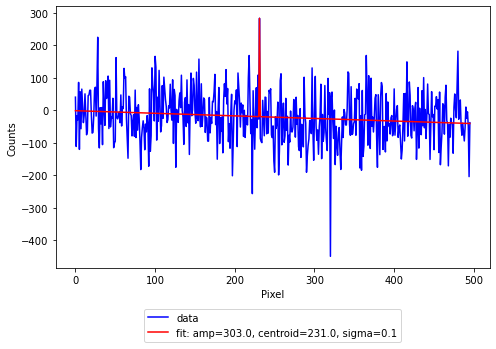

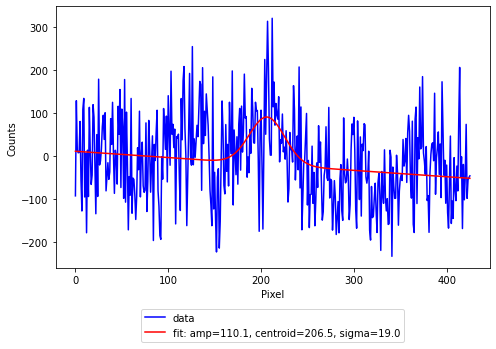

In [ ]:
im = Image(image, ncol, nrow, bg_image=bg_image)

im.reshape_im()
im.subtract_bg()
im.get_im_projection()

# plt.imshow(im.proc_image)

meas =  im.get_sizes(show_plots=True)

In [32]:
19*110

2090

In [2]:
import epics
resolution = epics.cainfo("OTRS:HTR:330:RESOLUTION.EGU")

== OTRS:HTR:330:RESOLUTION.EGU  (time_string) ==
   value      = um/px
   char_value = 'um/px'
   count      = 1
   nelm       = 1
   type       = time_string
   host       = cpu-htr-pm02.slac.stanford.edu:40705
   access     = read/write
   status     = 0
   char_status= NO_ALARM
   severity   = 0
   char_severity       = NO_ALARM
   timestamp  = 1659652985.977 (2022-08-04 15:43:05.97684)
   posixseconds        = 1659652985.0
   nanoseconds= 976835749
   PV is internally monitored, with 0 user-defined callbacks:


In [1]:
from pyemittance.otrs_io import get_beamsizes_otrs

In [2]:
get_beamsizes_otrs(False)

Fitting failed, taking initial guess.
Beam params out of bounds in image 0 out of 3 samples
Beam params out of bounds in image 1 out of 3 samples
Beam params out of bounds in image 2 out of 3 samples
Beam params out of bounds in averaged image
Low beam intensity/noisy or beam too small/large.
Waiting 1 sec and repeating measurement...
Beam params out of bounds in image 0 out of 3 samples
Beam params out of bounds in image 1 out of 3 samples
Beam params out of bounds in image 2 out of 3 samples
Beam params out of bounds in averaged image
Resampled 1 times, beam still out of bounds 

xrms 6.32 um, yrms 46.14 um (threshold: min_rms 122.95 um, max_rms 17213.00 um)
xamp 1592.30, yamp 16.86 (amp_thresh: 300, in json)
area_x 477689.4, area_y 5057.7 (threshold: 1500, hardcoded)

Returning NaNs


(nan, nan, nan, nan)


# Pyemit

In [9]:
from pyemittance.emittance_calc import EmitCalc
import json

In [55]:
#emit = json.load(open("../ml_tuning/20220803/saved_fits/pyemittance_data_2022-08-03_12-06-45-171758.json"))
emit = json.load(open("../ml_tuning/20220803/saved_fits/pyemittance_data_2022-08-03_12-49-38-898797.json))

# AFTER 12-49-38-898797 first wire scan

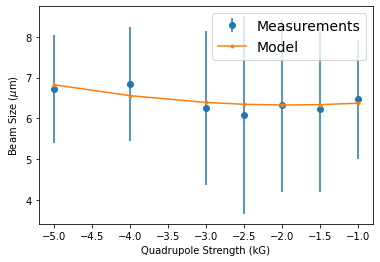

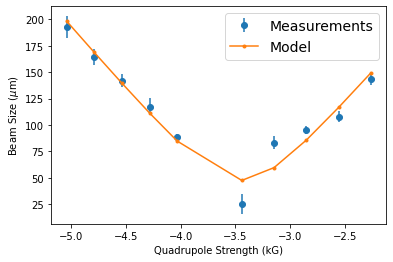

{'nemitx': 1.3020905389757202e-09,
 'nemity': 1.4122524867229947e-06,
 'nemitx_err': 4.751988921587494e-09,
 'nemity_err': 9.539567747823122e-08,
 'nemit': 4.288217113914529e-08,
 'nemit_err': 1.5652560094593753e-07,
 'bmagx': 4.938211633797193,
 'bmagy': 1.264425596593418,
 'bmagx_err': 18.022039385001868,
 'bmagy_err': 0.08541017809620313,
 'opt_q_x': -2.5,
 'opt_q_y': -4.032076881131254,
 'total_points_measured': None,
 'bmag_emit': 1.07153967107385e-07,
 'bmag_emit_err': 5.531359255160131e-07,
 'quadvalsx': [-4.999999999999999,
  -3.9999999999999996,
  -3.0000000000000004,
  -2.5,
  -1.9999999999999998,
  -1.4999999999999996,
  -0.9999999999999994],
 'beamsizesx': [6.723102022459335e-06,
  6.8358356332533355e-06,
  6.251910923498753e-06,
  6.079250255363984e-06,
  6.3171504358832285e-06,
  6.222578248006867e-06,
  6.465507998245947e-06],
 'beamsizeserrx': [1.3293183926621525e-06,
  1.3983125320365282e-06,
  1.8871870579384425e-06,
  2.4290368099536824e-06,
  2.1224184678090896e-06,

In [56]:
em_calc = EmitCalc(
    {'x': emit['quadvalsx'], 'y': emit['quadvalsy']},
    {'x': emit['beamsizesx'], 'y': emit['beamsizesy']},
    {'x': emit['beamsizeserrx'], 'y': emit['beamsizeserry']}
)
em_calc.plot=True
em_calc.calc_bmag=True
em_calc.get_emit()